<a href="https://colab.research.google.com/github/yjaeseok/Tensorflow_study/blob/master/colab/week6/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ2TFSP/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ2TFSP/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ2TFSP/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [7]:
assert original_string == sample_string

In [8]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [10]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [12]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 43s 110ms/step - loss: 0.6255 - accuracy: 0.5875 - val_loss: 0.4433 - val_accuracy: 0.7969
Epoch 2/10
391/391 [==============================] - 43s 109ms/step - loss: 0.3408 - accuracy: 0.8561 - val_loss: 0.3438 - val_accuracy: 0.8526
Epoch 3/10
391/391 [==============================] - 43s 109ms/step - loss: 0.2530 - accuracy: 0.9006 - val_loss: 0.3295 - val_accuracy: 0.8682
Epoch 4/10
391/391 [==============================] - 42s 108ms/step - loss: 0.2080 - accuracy: 0.9230 - val_loss: 0.3512 - val_accuracy: 0.8583
Epoch 5/10
391/391 [==============================] - 43s 109ms/step - loss: 0.1860 - accuracy: 0.9334 - val_loss: 0.3256 - val_accuracy: 0.8635
Epoch 6/10
391/391 [==============================] - 44s 111ms/step - loss: 0.1644 - accuracy: 0.9423 - val_loss: 0.3697 - val_accuracy: 0.8391
Epoch 7/10
391/391 [==============================] - 43s 110ms/step - loss: 0.1496 - accuracy: 0.9481 - val_loss: 0.3899 - val_ac

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 19s 49ms/step - loss: 0.4199 - accuracy: 0.8543
Test Loss: 0.41989731788635254
Test Accuracy: 0.8543199896812439


In [15]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [16]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [17]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-0.06437957]]


In [18]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-0.02440694]]


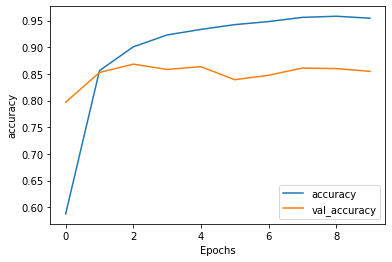

In [19]:
plot_graphs(history, 'accuracy')

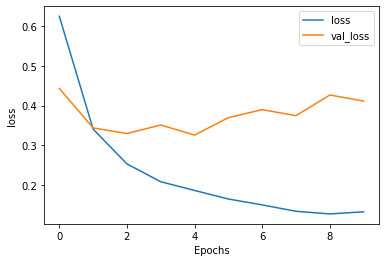

In [20]:
plot_graphs(history, 'loss')

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [22]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 76s 195ms/step - loss: 0.6632 - accuracy: 0.5430 - val_loss: 0.5027 - val_accuracy: 0.7693
Epoch 2/10
391/391 [==============================] - 75s 192ms/step - loss: 0.3663 - accuracy: 0.8488 - val_loss: 0.3879 - val_accuracy: 0.8156
Epoch 3/10
391/391 [==============================] - 75s 191ms/step - loss: 0.2574 - accuracy: 0.9050 - val_loss: 0.3898 - val_accuracy: 0.8661
Epoch 4/10
391/391 [==============================] - 75s 192ms/step - loss: 0.2112 - accuracy: 0.9267 - val_loss: 0.3748 - val_accuracy: 0.8380
Epoch 5/10
391/391 [==============================] - 74s 189ms/step - loss: 0.1784 - accuracy: 0.9408 - val_loss: 0.3959 - val_accuracy: 0.8250
Epoch 6/10
391/391 [==============================] - 74s 189ms/step - loss: 0.1556 - accuracy: 0.9503 - val_loss: 0.4068 - val_accuracy: 0.8609
Epoch 7/10
391/391 [==============================] - 75s 191ms/step - loss: 0.1244 - accuracy: 0.9632 - val_loss: 0.4479 - val_ac

In [24]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 33s 85ms/step - loss: 0.5435 - accuracy: 0.8514
Test Loss: 0.5435498952865601
Test Accuracy: 0.851360023021698


In [25]:
sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-2.846999]]


In [26]:
sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-3.7485373]]


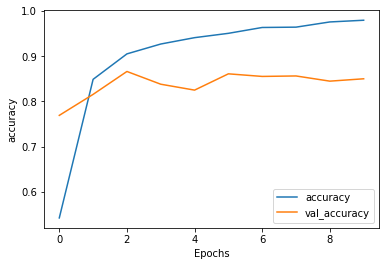

In [27]:
plot_graphs(history, 'accuracy')

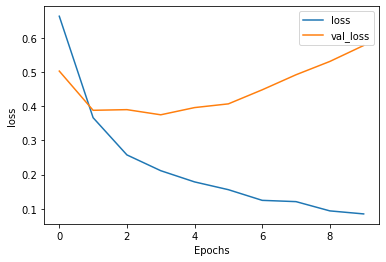

In [28]:
plot_graphs(history, 'loss')